In [5]:
!pip install seaborn

## State of the art (ROAD, sort base ranking and linear noisy imputation notrain method)

In [6]:

notretrain_threshold_linear = "/workspaces/outputs/road_8_exp_mothods/gb/sort/results/noretrain.json"



In [7]:
import json
import pandas as pd
import numpy as np

In [8]:
with open(notretrain_threshold_linear) as json_file:
    notretrain_threshold_linear = json.load(json_file)

In [9]:
def averaging_accuracy(dict_result):
    import copy
    
    dictionary = copy.deepcopy(dict_result)
    for method in dictionary['imputations']:
        for key_m, value_m in dictionary[method].items():
            for key_sb, value_ac in value_m.items():
                for key_f, value_f in  value_ac.items():                  
                    for key_p, value_ar in value_f.items():
                      
                        value_f[key_p] = sum(value_ar)/len(value_ar)
    return dictionary

In [23]:
def plot_consistancy( data_dict, appraoch="zero", morf=True, path=None, items=["gb"]):
    import seaborn as sns
    import copy
    if morf:
        method = 'MoRF'
    else:
        method ='LeRF'
    printable_data_dict = copy.deepcopy(data_dict)
    new_dict = {}
    new_dict['x_axis'] = printable_data_dict["percentages"]
    for key_m,  val_m in printable_data_dict[appraoch].items():
        if key_m in items:
            for key_var, val_var in val_m.items():
                if not morf:
                    accs = val_var['lerf']
                    l = list(accs.values())
                    #l.reverse()
                    new_dict[f"{key_m}-{key_var}"] = l
                else:
                    accs = val_var['morf']
                    new_dict[f"{key_m}-{key_var}"] = list(accs.values())
                 

    import seaborn as sns
    sns.set_theme(style="whitegrid")

    data = pd.DataFrame.from_dict(new_dict)
    data = data.set_index('x_axis')

    ax = sns.lineplot(data=data, palette="tab10", linewidth=2.5)
    ax.set(ylim=(0.0, 1))
    ax.set(xlim=(0.0, 1))
    ax.set(xlabel=f'Portion romoved {method}', ylabel='Accuracy')
    ax.figure.savefig(f'{path}/{appraoch}-{method}.png')
    ax.figure.clf()
   

from scipy.stats import spearmanr
def calculate_sperman_rank(accuracy_result, method = "telea", morf=True):
    ranking = {}
    for key_m,  val_m in accuracy_result[method].items():
        for key_var, val_var in val_m.items():
            if morf:
                res = np.array(list(val_var["morf"].values()))
                res = 1 - np.array(res)
                per = list(val_var["morf"].keys())
                
                per = [float(x) for x in per]
            else:
                res =  list(val_var["lerf"].values())
                #res.reverse()
                res = 1 - np.array(res)
                per = list(val_var["lerf"].keys())
                
                per = [float(x) for x in per]
                
            score = spearmanr(per, res).correlation
            ranking[f"{key_m}-{key_var}"] = score
    ranking = {k: v for k, v in sorted(ranking.items(),  key=lambda item: item[1])}
    
    return ranking



In [11]:
def calculate_spearman_morf_lerf(accuracy_result, method = "telea"):
    scores =[]
    for key_m,  val_m in accuracy_result[method].items():
        for key_var, val_var in val_m.items():
                morf = list(val_var["morf"].values())
                lerf =  list(val_var["lerf"].values())
                #lerf.reverse()
                score = spearmanr(morf, lerf).correlation
                scores.append(score)
    return scores


In [12]:
def calculate_correlation(accuracy_result, method= "telea"):
    scores = {}
    from scipy.stats.stats import pearsonr   
    for key_m,  val_m in accuracy_result[method].items():
        for key_var, val_var in val_m.items():
                morf = list(val_var["morf"].values())
                lerf =  list(val_var["lerf"].values())
                #lerf.reverse()
                #lerf = 1 - np.array(lerf)
                scores[key_var] = pearsonr(morf,lerf)

    return scores

In [13]:
def show_images(path):
    from PIL import Image
    import glob
    images = glob.glob(f'{path}/*.png')
    for im in images:
        im = Image.open(im)
        display(im)



In [14]:

averaged_accuracy_threshold_linear = averaging_accuracy(notretrain_threshold_linear)




## Liner fixed

## Threshold (Linear)

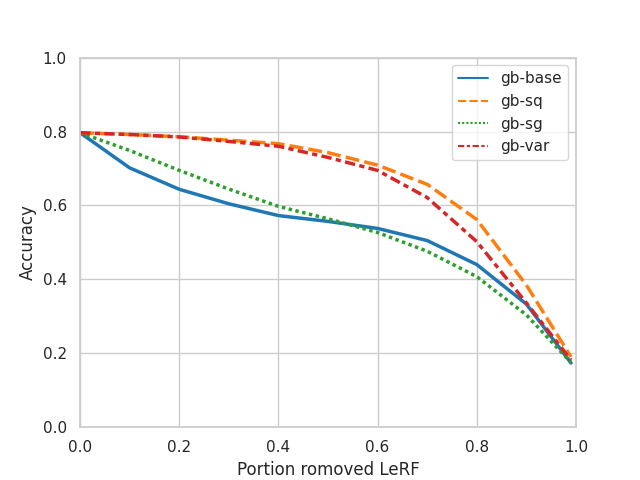

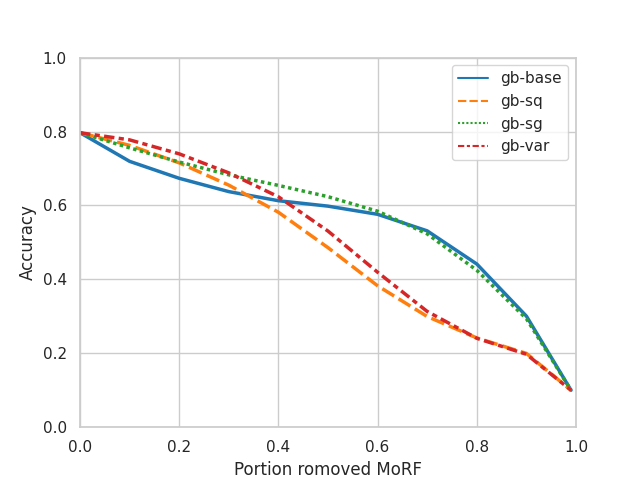

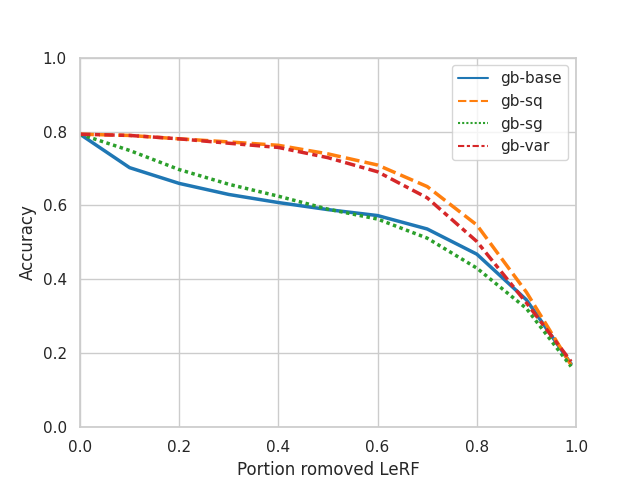

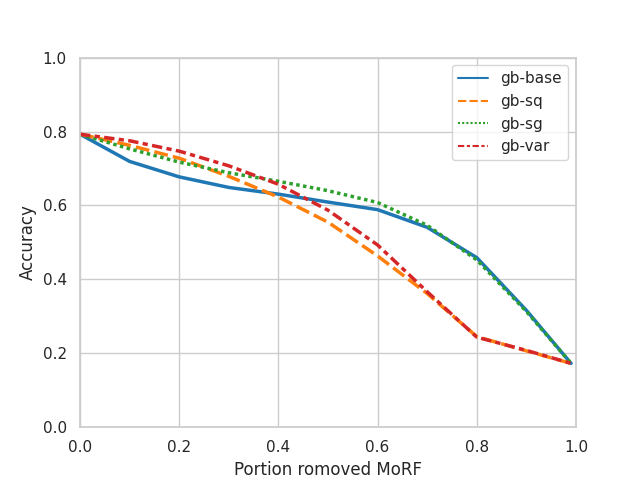

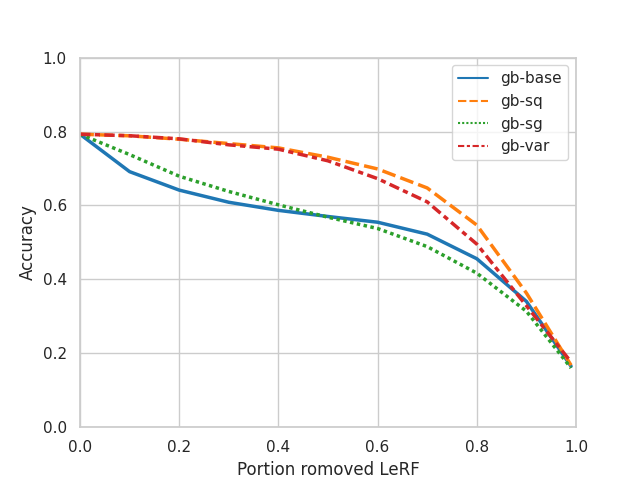

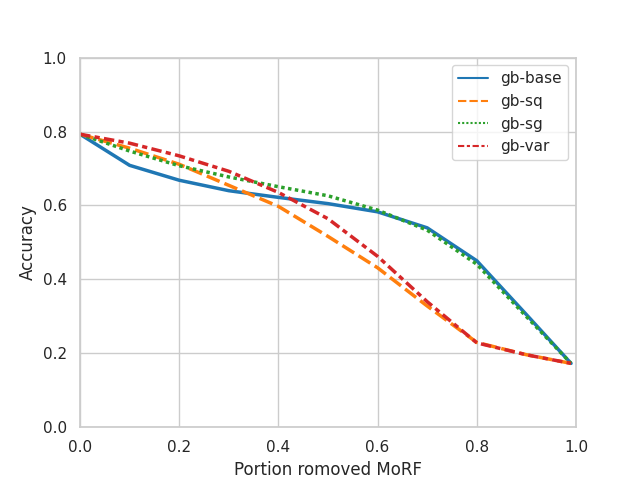

<Figure size 640x480 with 0 Axes>

In [20]:
plot_consistancy(averaged_accuracy_threshold_linear, morf=True, appraoch="ns", path=f'/workspaces/outputs/road_8_exp_mothods/gb/sort/plots')
show_images(f'/workspaces/outputs/road_8_exp_mothods/gb/sort/plots')

In [24]:
ranking = calculate_sperman_rank(averaged_accuracy_threshold_linear, method='linear', morf=True)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuracy_threshold_linear, method='linear', morf=False)
print(ranking)

{'gb-base': 1.0, 'gb-sq': 1.0, 'gb-sg': 1.0, 'gb-var': 1.0, 'ig-base': 1.0, 'ig-sq': 1.0, 'ig-sg': 1.0, 'ig-var': 1.0}
{'ig-base': 0.8363636363636365, 'ig-sg': 0.8636363636363636, 'gb-base': 1.0, 'gb-sq': 1.0, 'gb-sg': 1.0, 'gb-var': 1.0, 'ig-sq': 1.0, 'ig-var': 1.0}


In [125]:
scores =  calculate_spearman_morf_lerf(averaged_accuracy_threshold_linear, method='linear')
print(scores)


KeyError: 'lerf'

## Threshold (fixed)

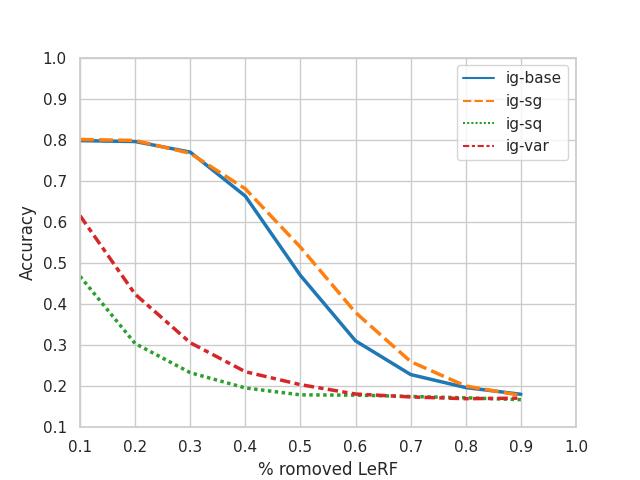

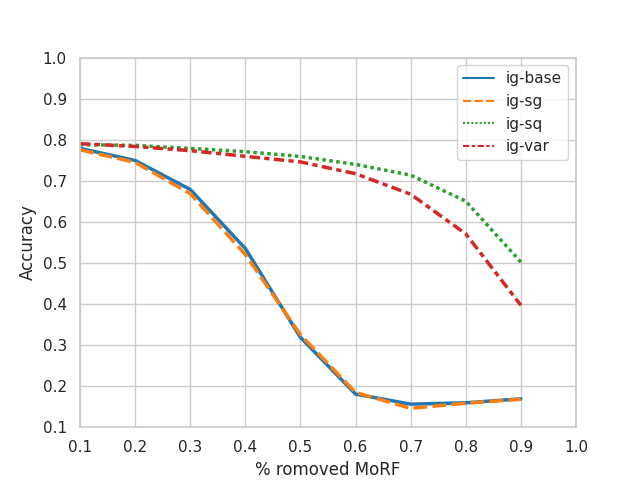

<Figure size 640x480 with 0 Axes>

In [131]:
plot_consistancy(averaged_accuracy_threshold_fixed, morf=False, appraoch="fixed", path=f'/workspaces/outputs/road_exp_2/threshold_fixed/plots')
plot_consistancy(averaged_accuracy_threshold_fixed, morf=True, appraoch="fixed", path=f'/workspaces/outputs/road_exp_2/threshold_fixed/plots')
show_images('/workspaces/outputs/road_exp_2/threshold_fixed/plots')

## Threshold (telea)

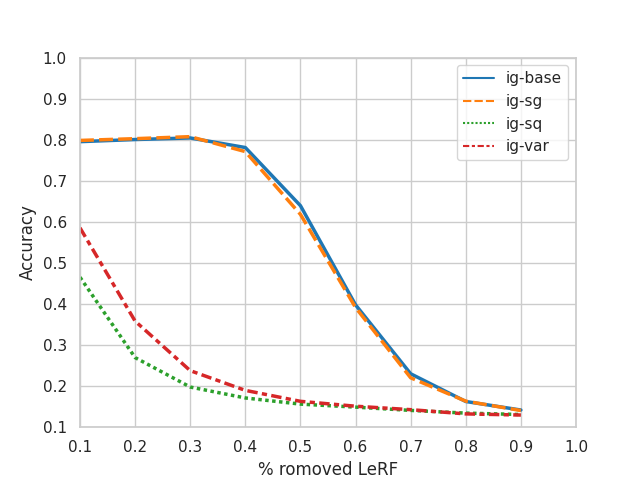

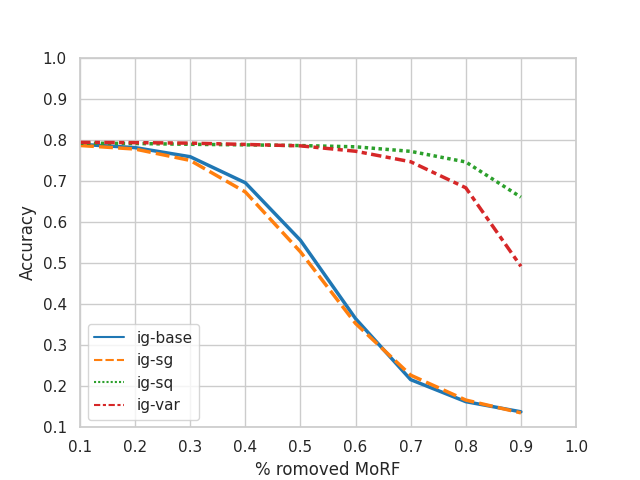

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_consistancy(averaged_accuracy_threshold_l, morf=False, appraoch="telea", path=f'/workspaces/outputs/road_exp_2/threshold_telea/plots')
plot_consistancy(averaged_accuracy_threshold_telea, morf=True, appraoch="telea", path=f'/workspaces/outputs/road_exp_2/threshold_telea/plots')
show_images('/workspaces/outputs/road_exp_2/threshold_telea/plots')

In [132]:
ranking = calculate_sperman_rank(averaged_accuracy_threshold_telea, method='telea', morf=False)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuracy_threshold_telea, method='telea', morf=True)
print(ranking)


{'ig-base': 0.9333333333333332, 'ig-sg': 0.9333333333333332, 'ig-sq': 1.0, 'ig-var': 1.0}
{'ig-base': 1.0, 'ig-sg': 1.0, 'ig-sq': 1.0, 'ig-var': 1.0}


In [133]:

scores =  calculate_spearman_morf_lerf(averaged_accuracy_threshold_telea, method='telea')
print("Spearman rank:", scores)

Spearman rank: [0.9333333333333332, 0.9333333333333332, 1.0, 1.0]


## Threshold (NS)

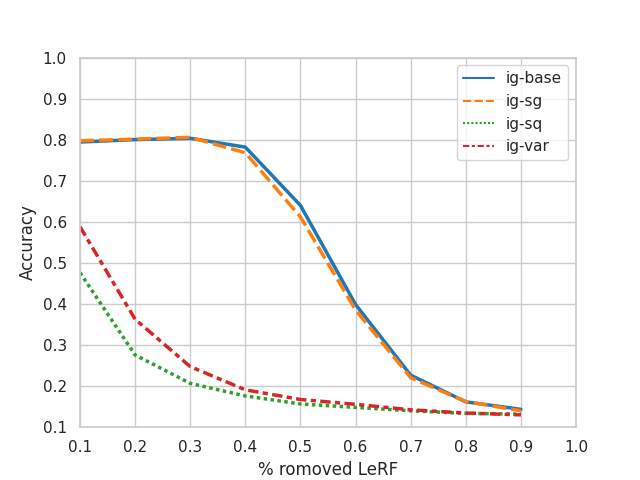

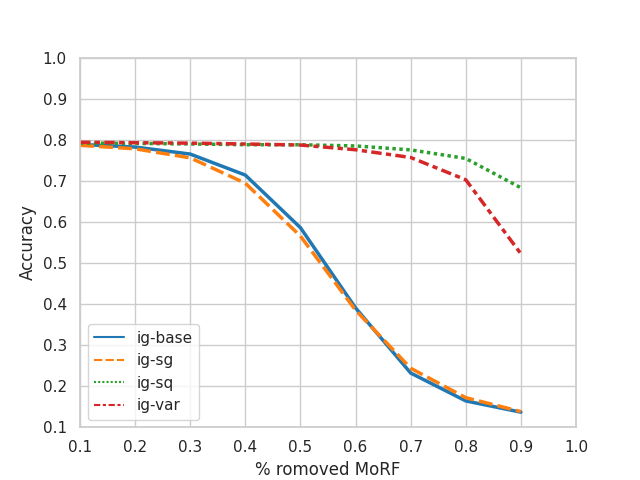

<Figure size 640x480 with 0 Axes>

In [134]:
plot_consistancy(averaged_accuracy_threshold_ns, morf=False, appraoch="ns", path=f'/workspaces/outputs/road_exp_2/threshold_ns/plots')
plot_consistancy(averaged_accuracy_threshold_ns, morf=True, appraoch="ns", path=f'/workspaces/outputs/road_exp_2/threshold_ns/plots')
show_images('/workspaces/outputs/road_exp_2/threshold_ns/plots')

In [135]:
ranking = calculate_sperman_rank(averaged_accuracy_threshold_ns, method='ns', morf=False)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuracy_threshold_ns, method='ns', morf=True)
print(ranking)

{'ig-base': 0.9333333333333332, 'ig-sg': 0.9333333333333332, 'ig-sq': 1.0, 'ig-var': 1.0}
{'ig-base': 1.0, 'ig-sg': 1.0, 'ig-sq': 1.0, 'ig-var': 1.0}


In [136]:

scores =  calculate_spearman_morf_lerf(averaged_accuracy_threshold_ns, method='ns')
print("Spearman rank:", scores)

Spearman rank: [0.9333333333333332, 0.9333333333333332, 1.0, 1.0]


## Sort(fixed)


## Coorelation of morf and lerf

## Sorted (fixed)

In [138]:
calculate_correlation(averaged_accuracy_threshold_fixed, method="fixed")

/tmp/ipykernel_45241/2138539284.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


{'base': PearsonRResult(statistic=0.9817646690238422, pvalue=2.6485613225086107e-06),
 'sg': PearsonRResult(statistic=0.9602853967755415, pvalue=3.9534267002138184e-05),
 'sq': PearsonRResult(statistic=0.4667398689126897, pvalue=0.20530565873734619),
 'var': PearsonRResult(statistic=0.5462401059529756, pvalue=0.12811205817125979)}

In [ ]:
calculate_correlation(averaged_accuarcy_linear, method="linear")

/tmp/ipykernel_3991/2138539284.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


{'base': PearsonRResult(statistic=-0.7536900825670164, pvalue=0.01900538191424471),
 'sg': PearsonRResult(statistic=-0.8123749893581141, pvalue=0.007799330520257625),
 'sq': PearsonRResult(statistic=-0.9276126461057043, pvalue=0.00031288836537117547),
 'var': PearsonRResult(statistic=-0.9573157562094782, pvalue=5.073548521844479e-05)}

In [139]:
calculate_correlation(averaged_accuracy_threshold_linear, method="linear")

/tmp/ipykernel_45241/2138539284.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


{'base': PearsonRResult(statistic=0.9938579091285402, pvalue=5.9435735043931955e-08),
 'sg': PearsonRResult(statistic=0.992926628482392, pvalue=9.732833644321106e-08),
 'sq': PearsonRResult(statistic=0.3981689264625232, pvalue=0.2885226724137182),
 'var': PearsonRResult(statistic=0.41329206638787097, pvalue=0.26887207666556173)}

In [ ]:
calculate_correlation(averaged_accuracy_threshold_ns, method="ns")

/tmp/ipykernel_3991/2138539284.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


{'base': PearsonRResult(statistic=-0.9263400032707716, pvalue=0.0003321460841260361),
 'sg': PearsonRResult(statistic=-0.9455815133479021, pvalue=0.00011733988851811001),
 'sq': PearsonRResult(statistic=-0.9950969389628619, pvalue=2.7045844714479748e-08),
 'var': PearsonRResult(statistic=-0.9840856771082567, pvalue=1.6483782290700677e-06)}